# Class 16: Error Propagation and Simulation

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Class 16 Learning Objectives

After studying this notebook, completing the activities, engaging in class, and reading the book, you should be able to:
* Apply error propagation formulas to predict uncertainty in calculations using experimental data
* Derive linear error propagation formulas from definitions of expected value and variance
* Derive general nonlinear error propagation formulas from Taylor series approximation
* Use multivariate error propagation formula
* Estimate probabilities using simulation

### Online Class Structure

**Asynchronous**: Before our scheduled class time, please complete these home activities and the handouts. Turn in your home activities via Vocareum and Gradescope. You should read the book or watch the recorded lecture material. Please also prepare a list of questions you plan to ask during our virtual class.

See the class schedule on Sakai for each class session topic and the assigned  preparation.

**Synchronous:** During our scheduled class time, we will answer all of your questions on this material. We will then work through a few example problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 16a. Measurement Error

**Further Reading**: §3.1 in Navidi (2015)

All measurements have uncertainty. As engineers, we need to i) gather data, ii) estimate uncertainty, iii) propagate uncertainty through calculations, and, ultimately iv) draw conclusions and make decisions under uncertainty.

Let's get started with some important definitions.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Read pg. 164 - 165 in Navidi (2015). Fill in the following definitions.
</div>

**Error**

**Systematic Error / Bias**

**Random Error**

**Accuracy**

**Unbiased**

**Precision**

**Random / Statistical Uncertainty**


Target practice is a classic example used to explain how accuracy and precision are different:

![darts](https://manoa.hawaii.edu/exploringourfluidearth/sites/default/files/M1U1-SF%201-5_Accuracy%20and%20Precision.png)



<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write captions for each figure. Using target practice as an example, explain how accuracy and precision are different.
</div>

**Home Activity Answers**:

(Write captions for each figure.)

**A**:

**B**:

**C**:

**D**:

(In 1 sentence, explain how accuracy and precision are different.)

**Explanation:**

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Answer the following multiple choice question. Store your answer in the integer variable <tt>ans_16a_1</tt>.
</div>

The boiling point of water at sea level is measures four times. The results are 110.01 °C, 110.02 °C, 109.99 °C, and 110.01 °C. Which is the following statements best describes the measuring process:
1. Accurate but not precise
2. Precise but not accurate
3. Neither accuracy nor precise
4. Both accurate and precise

In [2]:
### BEGIN SOLUTION
ans_16a_1 = 2
### END SOLUTION

In [3]:
### BEGIN HIDDEN TESTS
secret_ans = 2

assert ans_16a_1 == secret_ans, "What is the boiling point of water? How consistent are the measurements?"

### END HIDDEN TESTS

Armed with those definitions, we can beginning to connect experimental measurements with probability theory. Here are some key ideas:
* A measured value is a random variable with mean $\mu$ and standard deviation $\sigma$.
* The bias in the measuring process is the difference between the mean measurement and the true value: Bias = $\mu$ - true value
* The uncertainty in the measuring process is the standard deviation $\sigma$.
* The smaller the bias, the more accurate the measuring process.
* The smaller the uncertainty, the more precise the measuring process.

A key idea in statistical analysis is to use a sample, e.g., data gathered from repeat experiments, to estimate the population mean and variance. For example, imagine we wanted to know the weight of a brick. From repeated measurements on a scale, we could compute a sample mean and standard deviation. This is an estimate to the population true weight of the brick (population mean) random noise from the scale (population standard deviation).

Let $X_1$, $X_2$, ..., $X_n$, be independent measurements, all made by the same process on the same quantity.
* The sample standard deviation $s$ can be used to estimate the uncertainty.
* Estimates of uncertainty are often crude, especially when based on sample samples.
* If the true value is know, the sample mean $\bar{X}$ can be used to estimate the bias: Bias $\approx$ $\bar{X}$ - true value
* If the true value is unknown, the bias cannot be estimated from repeat measurements.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Answer the following true false questions. Store your answer in the dictionary <tt>ans_16a_2</tt>. Use the integers 1, 2, 3, and 4 as the keys. Record strings 'F' or 'T' as the values.
</div>

The weight of an object is given as 67.2 $\pm$ 0.3g. True of false:
1. The weight was measured to be 67.2 g.
2. The true weight of the object is 67.2 g.
3. The bias in the measurement is 0.3 g.
4. The uncertainty in the measurement is 0.3 g.

In [4]:
# Create dictionary to store the answers
ans_16a_2 = {}

### BEGIN SOLUTION
ans_16a_2[1] = 'T'
ans_16a_2[2] = 'F'
ans_16a_2[3] = 'F'
ans_16a_2[4] = 'T'
### END SOLUTION

In [5]:
### BEGIN HIDDEN TESTS
assert ans_16a_2[1] == 'T', "The first part of X +- Y is the measurement value (or average)."
assert ans_16a_2[2] == 'F', "Without additional information, we do not know the true weight of the object."
assert ans_16a_2[3] == 'F', "Without additional information, we do not know the bias of the scale."
assert ans_16a_2[1] == 'T', "The second part of X +- Y is the measurement uncertainty."
### END HIDDEN TESTS

## 16b. Error Propagation

**Further Reading**: §3.2, §3.3, and §3.4 in Navidi (2015)

As engineers, we are rarely interested in simply characterizing the uncertainty in measurements. Instead, we often use the measurement values to perform calculations. Naturally, we want to propagate the uncertainty from the measures through to the calculation. This is known as **error propagation**. I promise you will use it in multiple laboratory classes at Notre Dame and as practicing engineers after graduation.

Recall, we will model the outcome of measurements with random variables. As such, I will write the error propagation formulas as random variables. The formulas that follow are given for two measured quantities $X$ and $Y$, but generalize to any dimensions. We assume we know the measurement uncertainties $\sigma_X$ and $\sigma_Y$ as well as the covariance $\sigma_{X,Y}$. We want to estimate the uncertainty $\sigma_Z$ for the computed quantity $Z$.

### Addition and Subtraction

First, let's consider either adding or subtracting two measured quantities.

#### Addition Rule

Consider $Z = c_1 X + c_2 Y$:

$$\sigma_Z^2 = c_1^2 \sigma_X^2 + c_2^2 \sigma_Y^2 + 2 c_1 c_2 \sigma_{X,Y}$$

#### Subtraction Rule

Consider $Z = c_1 X - c_2 Y$:

$$\sigma_Z^2 = c_1^2 \sigma_X^2 + c_2^2 \sigma_Y^2 - 2 c_1 c_2 \sigma_{X,Y}$$


#### Derivation

Notice these formulas are exact. We'll explore that more during class.


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity (Video)</b>: Derive the addition/subtraction error propagation rules from the properties of random variables.
</div>

### Multiplication and Division Rule

#### Multiplication Rule

Consider $Z = X \cdot Y$:

$$\sigma_Z^2\approx \left(E[Z]\right)^2 \left[ 
	\left(\frac{\sigma_{X}}{E[X]} \right)^2 + \left(\frac{\sigma_{Y}}{E[Y]} \right)^2 + \frac{2 \sigma_{X,Y}}{E[X] E[Y]}
	\right]$$

#### Division Rule

Consider $Z = X / Y$:

$$\sigma_Z^2\approx \left(E[Z]\right)^2  \left[ 
	\left(\frac{\sigma_{X}}{E[X]} \right)^2 + \left(\frac{\sigma_{Y}}{E[Y]} \right)^2 - \frac{2 \sigma_{X,Y}}{E[X] E[Y]}
	\right]$$
    
#### Derivation

Notice these formulas are approximations. We'll see these formulas come from the more general differential function rule.

<div style="background-color: rgba(255,0,0,0.05) ; padding: 10px; border: 1px solid darkred;"> 
<b>Study Activity</b>: Derive the multiplication and division rules from the differentiable function rule.
</div>

### Differentiable Function

Next, let's consider any differentiable function.

#### Differentiable Function Rule

Consider $Z = g(X,Y)$:

$$\sigma_Z^2 \approx \left| \frac{\partial g}{\partial X} \right|^2 \sigma_X^2 + \left| \frac{\partial g}{\partial Y} \right|^2 \sigma_Y^2 + 2 \frac{\partial g}{\partial X} \frac{\partial g}{\partial Y} \sigma_{X,Y}$$

#### Derivation

Notice this formula is an approximation. We'll see it comes from a Taylor series approximation.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity (Video)</b>: Derive the differential function error propagation rule from the properties of random variables and a truncated Taylor series expansion.
</div>

### Example: Measuring Flowrate

Please see the handout.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity (Video) </b>: Complete the calculation on the handout on paper. We recommend trying this before watching the video. Then compare your answer to the code below.
</div>

#### Approach 1: Division Rule

In [6]:
import math
## Given data
Vf = 49.2
V0 = 5.3

t0 = 4
tf = 56

## Calculate differences
dV = Vf - V0
dt = tf - t0

## Specified assumed/estimated uncertainties
sV = 0.1 # units: mL
st = 1.0 # units: sec

## Calculate flowrate estimate
F = dV / dt
print("F = ",round(F,2)," mL/s")

F =  0.84  mL/s


In [7]:
## Apply the division rule
sF = F*math.sqrt(2*(sV/dV)**2 + 2*(st/dt)**2)
print("Uncertainty in F: sigmaF = ",round(sF,10)," mL/s")

Uncertainty in F: sigmaF =  0.0231205612  mL/s


#### Approach 2:  Differentiable Function Rule

In [8]:
# define function to calculate f
f = lambda x : (x[1] - x[0])/(x[3] - x[2])

x0 = [V0,Vf,t0,tf]
F0 = f(x0)

print("F =",round(F0,2),"mL/s")

F = 0.84 mL/s


In [9]:
# use finite difference to build gradient
import numpy as np
deltaF = np.zeros(4)

xc = x0.copy()

eps = 1E-6

for i in range(len(deltaF)):
    # perturb element i
    xc[i] += eps
    
    # apply forward finite different formula
    deltaF[i] = (f(xc) - F0)/eps

    # reset
    xc[i] = x0[i]
    
print("deltaF =",deltaF)

deltaF = [-0.01923077  0.01923077  0.01623521 -0.01623521]


In [10]:
Sig = np.zeros((4,4))
Sig[0,0] = sV**2
Sig[1,1] = sV**2
Sig[2,2] = st**2
Sig[3,3] = st**2
print("Covariance matrix of measurement errors:\n")
print(Sig)

Covariance matrix of measurement errors:

[[0.01 0.   0.   0.  ]
 [0.   0.01 0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]


In [11]:
# apply error propagation formula
sigmaF = math.sqrt(deltaF.dot(Sig.dot(deltaF)))
print("Uncertainty in F: sigmaF = ",round(sigmaF,10)," mL/s")

Uncertainty in F: sigmaF =  0.0231205611  mL/s


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: We will work through these problems together during class.
</div>

### Practice Problem A

Reference: §3.3, Problem 8 in Navidi.

The refractive index $n$ of a piece of glass is related to the critical angle $\theta$ by $n=1/\sin \theta$ Assume that the critical angle is measured to be 0.70 $\pm$ 0.02 rad. Estimate the refractive index, and find the uncertainty in the estimate.

In [12]:
### BEGIN SOLUTION
theta = 0.70 # rad
s_theta = 0.02 # rad

n = 1/np.sin(theta)
print("n = ",n)

dn_dtheta = - np.cos(theta) / np.sin(theta)**2
print("dn_dtheta = ",dn_dtheta)

s_n = np.abs(dn_dtheta) * s_theta
print("s_n = ",s_n)
### END SOLUTION

n =  1.552270326957104
dn_dtheta =  -1.842920266932432
s_n =  0.03685840533864864


### Practice Problem B

Reference: §3.4, Problem 8 in Navidi.

The pressure $P$, temperature $T$, and volume $V$ of one mole of an ideal gas are related by the equation $PV=RT$ where $P$ is measured in kilopascals, $T$ is measured in kelvins, and $V$ is measured in liters, and $R = 8.314$ with consistent units.
1. Assume that $P$ = 242.52 $\pm$ 0.03 kPa and $V$ = 10.103 $\pm$ 0.002 L. Estimate $T$, and find the uncertainty in the estimate.
2. Assume that $P$ = 242.52 $\pm$ 0.03 kPa and $T$ = 290.11 $\pm$ 0.02 K. Estimate $V$, and find the uncertainty in the estimate.
3. Assume that $V$ = 10.103 $\pm$ 0.002 L and $T$ = 290.11 $\pm$ 0.02 K. Estimate $P$, and find the uncertainty in the estimate.
4. Repeat calculation 1 assuming $P$ and $V$ are not independent, but have a covariance of **10$^{-5}$** kPa-L.

In [13]:
# Part 1
### BEGIN SOLUTION
P = 242.52 # kPa
sP = 0.03 # kPa

V = 10.103 # L
sV = 0.002 # L

# T = 290.11 # K
# sT = 0.02 # K

R = 8.314

T = P*V/R
sT = T * np.sqrt((sP/P)**2 + (sV/V)**2)

print("P = ",P," +/- ",sP," kPa")
print("V = ",V," +/- ",sV," L")
print("T = ",T, "+/- ",sT, "K")
### END SOLUTION

P =  242.52  +/-  0.03  kPa
V =  10.103  +/-  0.002  L
T =  294.7052634111138 +/-  0.06879365869176007 K


In [14]:
# Part 2
### BEGIN SOLUTION
P = 242.52 # kPa
sP = 0.03 # kPa

# V = 10.103 # L
# sV = 0.002 # L

T = 290.11 # K
sT = 0.02 # K

R = 8.314

V = R*T/P
sV = V * np.sqrt((sP/P)**2 + (sT/T)**2)

print("P = ",P," +/- ",sP," kPa")
print("V = ",V," +/- ",sV," L")
print("T = ",T, "+/- ",sT, "K")
### END SOLUTION

P =  242.52  +/-  0.03  kPa
V =  9.9454665182253  +/-  0.0014084202098616082  L
T =  290.11 +/-  0.02 K


In [15]:
# Part 3
### BEGIN SOLUTION
# P = 242.52 # kPa
# sP = 0.03 # kPa

V = 10.103 # L
sV = 0.002 # L

T = 290.11 # K
sT = 0.02 # K

R = 8.314

P = R*T/V
sP = P * np.sqrt((sV/V)**2 + (sT/T)**2)

print("P = ",P," +/- ",sP," kPa")
print("V = ",V," +/- ",sV," L")
print("T = ",T, "+/- ",sT, "K")
### END SOLUTION

P =  238.73844798574683  +/-  0.05004472373860672  kPa
V =  10.103  +/-  0.002  L
T =  290.11 +/-  0.02 K


In [16]:
# Part 4
### BEGIN SOLUTION
P = 242.52 # kPa
sP = 0.03 # kPa

V = 10.103 # L
sV = 0.002 # L

# T = 290.11 # K
# sT = 0.02 # K

sPV = 1E-5 # kPa-L

R = 8.314

T = P*V/R
sT = T * np.sqrt((sV/V)**2 + (sP/P)**2 + 2*sPV/P/V)

print("P = ",P," +/- ",sP," kPa")
print("V = ",V," +/- ",sV," L")
print("T = ",T, "+/- ",sT, "K")
### END SOLUTION

P =  242.52  +/-  0.03  kPa
V =  10.103  +/-  0.002  L
T =  294.7052634111138 +/-  0.07376655639974125 K


### Practice Problem C

Reference: §3.4, Problem 16 in Navidi.

According to Newton's law of cooling, the time $t$ needed for an object at an initial temperature $T_0$ to cool to a temperature $T$ in an environment with ambient temperature $T_a$ is given by

$$t = \frac{\ln(T_0 - T_a)}{k} - \frac{\ln(T - T_a)}{k}$$

where $k$ is a constant. Assume that for a certain type of container, $k$ = 0.025 min$^{-1}$. Let $t$ be the number of minutes needed to cool the container to a temperature of 50$^\circ{}$F. Assume $T_0$ = 70.1 $\pm$ 0.2$^\circ{}$F and $T_a$ = 35.7 $\pm$ 0.1$^\circ{}$F. Estimate $t$, and find the uncertainty in the estimate.

In [17]:
# Define function and calculate t

### BEGIN SOLUTION

def f(x):
    ''' Calculate time
    
    Args:
        x = [T0, Ta] in degrees F
        
    Returns:
        t = time in minutes
    '''
    
    k = 0.025 # 1/min
    T = 50 # degrees F
    
    T0 = x[0]
    Ta = x[1]
    
    t = np.log(T0 - Ta)/k - np.log(T - Ta)/k
    
    return t

x0 = [70.1, 35.7]
F0 = f(x0)
print("t = ",F0," min\n")

### END SOLUTION

t =  35.11188108453962  min



In [18]:
# Estimate gradient with finite difference
### BEGIN SOLUTION

deltaF = np.zeros(2)

xc = x0.copy()

eps = 1E-6

for i in range(len(deltaF)):
    # perturb element i
    xc[i] += eps
    
    # apply forward finite different formula
    deltaF[i] = (f(xc) - F0)/eps

    # reset
    xc[i] = x0[i]
    
print("deltaF =",deltaF)

### END SOLUTION

deltaF = [1.16279068 1.63441221]


In [19]:
# Assemble covariance matrix and apply error propagation formula

### BEGIN SOLUTION
Sig = np.zeros((2,2))
Sig[0,0] = 0.2**2
Sig[1,1] = 0.1**2
print("Covariance matrix of measurement errors:")
print(Sig)

print("\nUncertainty estimate:")
print("s_t = ",np.sqrt(deltaF @ Sig @ deltaF)," min")
### END SOLUTION

Covariance matrix of measurement errors:
[[0.04 0.  ]
 [0.   0.01]]

Uncertainty estimate:
s_t =  0.2842469342469589  min


## 16c. Simulation

**Further Reading:** §4.12 in Navidi

Consider two resistors in parallel with resistances $X \sim \mathcal{N}(10~\Omega,~10^2~\Omega^2)$ and $Y \sim \mathcal{N}(25~\Omega,~2.5^2~\Omega^2)$. The total resistance of the circuit is

$$R = \frac{X Y}{X + Y}$$

Assume $X$ and $Y$ are independent.

Notation: $X \sim \mathcal{N}(10~\Omega,~10^2~\Omega^2)$ says that random variable $X$ is normally distributed with mean $10~\Omega$ and variance $10^2~\Omega^2$. Next class we will learn more about the normal distribution. But you can solve this problem using only the mean and variance.

What is $P(19~\Omega \leq R \leq 21~\Omega)$, i.e., the probability the circuit is within specification?

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Pause the video. Spend 3 minutes outlining your solution strategy using probability theory. First, write down the main steps. Then, if you have time, write down the formulas.
</div>

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Now watch the video. Does your approach match the class discussion? We will study the normal distribution more next class session.
</div>

### Using Simulation to Estimate a Probability

Intead of all of that calculus, we can use simulation to estimate this probability.

Repeat 1000s of times:
* Generate X and Y using a random number generator
* Compute $R$ and record the value

In [20]:
# specify number of simulations
nsim = 1000

# create vector to store the results
R_sim = np.zeros(nsim)


# create normally distributed noise
# loc = mean
# scale = standard deviation
x = np.random.normal(loc = 100, scale = 10, size=(nsim))
y = np.random.normal(loc = 25, scale=2.5, size=(nsim))
    
# calculate a1, store result
R_sim = x * y / (x + y)

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Estimate $P(19~\Omega \leq X \leq 21~\Omega)$ using your simulation results.
</div>

### Using Simulation to Estimate Means and Variances


In [21]:
# print some descriptive statistis
print("Mean: ",np.mean(R_sim)," Ohms")
print("Median: ",np.median(R_sim)," Ohms")
print("Standard Deviation: ",np.std(R_sim,ddof=1)," Ohms")

Mean:  19.896106291955807  Ohms
Median:  19.945475055638227  Ohms
Standard Deviation:  1.6152635830218904  Ohms


### Using Simulation to Determine Whether a Population is Approximately Normal

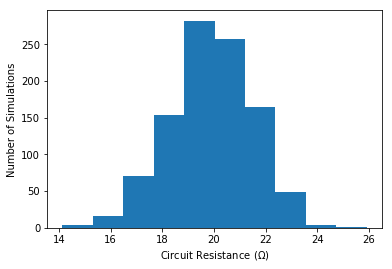

In [22]:
# create histogram of calculated a1 values
plt.hist(R_sim)
plt.xlabel("Circuit Resistance ($\Omega$)")
plt.ylabel("Number of Simulations")
plt.show()

### Practice Problem 4

Reference: §4.12, Problem 18 in Navidi.
    
The length of time to perform an oil change at a certain shop is normally distributed with mean 29.5 minutes and standard deviation 3 minutes. What is the probability that a mechanic can complete 16 oil changes in an eight-hour day?

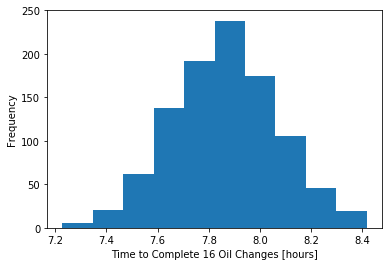

Probability of completing 16 oils changes in eight-hour shift: 0.743


In [23]:
# Let's use simulation! We'll learn how to calculate this answer by hand next class.

### BEGIN SOLUTION

# specify number of simulations
nsim = 1000

# create vector to store the results
sixteen_changes = np.zeros(nsim)

for i in range(nsim):
    # simulate 16 oil changes
    oil_changes = np.random.normal(loc = 29.5, scale = 3, size=16)
    
    # store total time
    sixteen_changes[i] = np.sum(oil_changes)

# convert from minutes to hours
sixteen_changes = sixteen_changes/60
    
plt.hist(sixteen_changes)
plt.xlabel("Time to Complete 16 Oil Changes [hours]")
plt.ylabel("Frequency")
plt.show()

print("Probability of completing 16 oils changes in eight-hour shift:",np.sum(sixteen_changes < 8)/nsim)
### END SOLUTION